In [8]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd
which_pc = 'Maxcell-HomePC'

In [9]:
import sys
sys.path.append("C:\\Users\\"+which_pc+"\\QishiQR")
import Utils.MajorContract_Offsets
import importlib

#importlib.reload(Utils.MajorContract_split)
from Utils.MajorContract_Offsets import *


import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

import Backtesting.Vectorized.Strategy
importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

# Zn data and PTBs

In [ ]:
prod = 'zn'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        zn_train, zn_test, zn_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1603':['2016-1-1','2016-2-29'],
                                                                     '1604':['2016-2-1','2016-3-31'],
                                                                     '1605':['2016-3-1','2016-4-30'],
                                                                     '1606':['2016-4-1','2016-5-31'],
                                                                     '1607':['2016-5-1','2016-6-30'],
                                                                     '1608':['2016-6-1','2016-7-31'],
                                                                     '1609':['2016-7-1','2016-8-31'],
                                                                     '1610':['2016-8-1','2016-9-30'],
                                                                     '1611':['2016-9-1','2016-10-31'],
                                                                     '1612':['2016-10-1','2016-11-30'],
                                                                     '1701':['2016-11-1','2016-12-31'],
                                                                     '1702':['2016-12-1','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1603':'2016-2-1', 
                                                                     '1604':'2016-3-1',
                                                                     '1605':'2016-4-1',
                                                                     '1606':'2016-5-1',
                                                                     '1607':'2016-6-1',
                                                                     '1608':'2016-7-1',
                                                                     '1609':'2016-8-1',
                                                                     '1610':'2016-9-1',
                                                                     '1611':'2016-10-1',
                                                                     '1612':'2016-11-1',
                                                                     '1701':'2016-12-1',
                                                                     '1702':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th, price = 'LastPrice').create_major_overlap()

        for offset in zn_test.keys():
            #zn_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'zn/'+str(freq)+'min/'+'zn_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1603', '1604', '1605', '1606', '1607', '1608']:
                zn_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/zn_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)


# Bu data and PTBs

In [3]:
prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        pct_th = pct_th_bps *0.0001
        step = freq/5
        offset = [0.1+i*step for i in range(5)]
        bu_train, bu_test, bu_probability_table = MajorContracts(symbol=prod, split_time = '2016-7-1', topdir=r'C:\\Users\\' + which_pc+ '\\QishiQR\\Data',
                                                                 maturity={
                                                                     '1606':['2015-11-1','2016-5-1'], 
                                                                     '1609':['2016-2-1','2016-8-1'], 
                                                                     '1612':['2016-6-1','2016-11-15'],
                                                                     '1706':['2016-10-15','2017-1-31']
                                                                          },
                                                                 transitions = {
                                                                     '1606':'2016-3-1', 
                                                                     '1609':'2016-7-1', 
                                                                     '1612':'2016-11-1', 
                                                                     '1706':'2017-1-1'
                                                                 },
                                                                 freq = freq, offset = offset, threshold = pct_th, price = 'AveragePrice').create_major_overlap()

        for offset in bu_test.keys():
            bu_test[offset].to_csv(r'../../Output/'+str(pct_th_bps)+'bps/'+'bu/'+str(freq)+'min/'+'bu_major_' + str(freq) + '_' + offset + '.csv')
            for contract in ['1606', '1609', '1612']:
                bu_probability_table[contract].to_csv(r'../../Strategy/'+str(pct_th_bps)+'bps/bu_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)



pct_th=0bps, freq = 5min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
bu1609 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', 

probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
probability table:  20160301.0 20160630.0
bu1612 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00
pct_th=5bps, freq = 30min
bu1606 C:\\Users\\Maxcell-HomePC\QishiQR\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160

# Zn/Bu PTB distribution

In [4]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]

for freq in freq_set:
    for pct_th_bps in pct_th_bps_set: 
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        slm['max_pct'] = slm.loc[:, '0':'2'].max(axis=1) / slm['total']
        slm.to_csv('../../Strategy/'+prod+'_major_strategy.csv')

        p1 = slm[slm['prior'].apply(len) == 2]
        p2 = slm[slm['prior'].apply(len) == 3]
        p3 = slm[slm['prior'].apply(len) == 4]
        p4 = slm[slm['prior'].apply(len) == 5]
        p5 = slm[slm['prior'].apply(len) == 6]
        p6 = slm[slm['prior'].apply(len) == 7]

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['total'].tolist()
        cnt_list1[0] = 0
        cnt_list1 = [cnt_num*3 for cnt_num in cnt_list1]
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['total'].tolist()
        cnt_list2[0] = 0
        cnt_list2 = [cnt_num*9 for cnt_num in cnt_list2]
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['total'].tolist()
        cnt_list3[0] = 0
        cnt_list3 = [cnt_num*27 for cnt_num in cnt_list3]
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['total'].tolist()
        cnt_list4[0] = 0
        cnt_list4 = [cnt_num*81 for cnt_num in cnt_list4]
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['total'].tolist()
        cnt_list5[0] = 0
        cnt_list5 = [cnt_num*243 for cnt_num in cnt_list5]
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['total'].tolist()
        cnt_list6[0] = 0
        cnt_list6 = [cnt_num*729 for cnt_num in cnt_list6]
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)
        fig.savefig(prod + '_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_cnt_dist.png', dpi=fig.dpi)

        fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize=(20, 20))
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        cnt_list1 = p1['max_pct'].tolist()
        cnt_list1[0] = 0
        plt.subplot(6, 1, 1)
        plt.bar(range(len(cnt_list1)), cnt_list1)
        cnt_list2 = p2['max_pct'].tolist()
        cnt_list2[0] = 0
        plt.subplot(6, 1, 2)
        plt.bar(range(len(cnt_list2)), cnt_list2)
        cnt_list3 = p3['max_pct'].tolist()
        cnt_list3[0] = 0
        plt.subplot(6, 1, 3)
        plt.bar(range(len(cnt_list3)), cnt_list3)
        cnt_list4 = p4['max_pct'].tolist()
        cnt_list4[0] = 0
        plt.subplot(6, 1, 4)
        plt.bar(range(len(cnt_list4)), cnt_list4)
        cnt_list5 = p5['max_pct'].tolist()
        cnt_list5[0] = 0
        plt.subplot(6, 1, 5)
        plt.bar(range(len(cnt_list5)), cnt_list5)
        cnt_list6 = p6['max_pct'].tolist()
        cnt_list6[0] = 0
        plt.subplot(6, 1, 6)
        plt.bar(range(len(cnt_list6)), cnt_list6)

        fig.savefig(prod+'_freq_'+str(freq)+'_pct_th_'+str(pct_th_bps)+'bps_max_pct_dist.png', dpi=fig.dpi)

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
pct_th=5bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


pct_th=10bps, freq = 30min
bu_1606_major_strategy_30_0.1.csv
bu_1606_major_strategy_30_12.1.csv
bu_1606_major_strategy_30_18.1.csv
bu_1606_major_strategy_30_24.1.csv
bu_1606_major_strategy_30_6.1.csv
bu_1609_major_strategy_30_0.1.csv
bu_1609_major_strategy_30_12.1.csv
bu_1609_major_strategy_30_18.1.csv
bu_1609_major_strategy_30_24.1.csv
bu_1609_major_strategy_30_6.1.csv
bu_1612_major_strategy_30_0.1.csv
bu_1612_major_strategy_30_12.1.csv
bu_1612_major_strategy_30_18.1.csv
bu_1612_major_strategy_30_24.1.csv
bu_1612_major_strategy_30_6.1.csv


## Zn/Bu backtesting 

pct_th=0bps, freq = 5min
bu_1606_major_strategy_5_0.1.csv
bu_1606_major_strategy_5_1.1.csv
bu_1606_major_strategy_5_2.1.csv
bu_1606_major_strategy_5_3.1.csv
bu_1606_major_strategy_5_4.1.csv
bu_1609_major_strategy_5_0.1.csv
bu_1609_major_strategy_5_1.1.csv
bu_1609_major_strategy_5_2.1.csv
bu_1609_major_strategy_5_3.1.csv
bu_1609_major_strategy_5_4.1.csv
bu_1612_major_strategy_5_0.1.csv
bu_1612_major_strategy_5_1.1.csv
bu_1612_major_strategy_5_2.1.csv
bu_1612_major_strategy_5_3.1.csv
bu_1612_major_strategy_5_4.1.csv
         prior    0   1    2  total signal
3277  p2222220  170  35  320    525      2
3278  p2222221   40  35    0     75      0
3279  p2222222  330  45  350    725      2
bu_major_5_0.1.csv


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
Index: 4368 entries, 2016-07-01 09:00:06 to 2016-09-30 14:55:06
Data columns (total 51 columns):
InstrumentID       4368 non-null object
Date               4368 non-null float64
TimeStamp          4368 non-null float64
LastPrice          4368 non-null float64
HighPrice          4368 non-null float64
LowPrice           4368 non-null float64
Volume             4368 non-null float64
Turnover           4368 non-null float64
AccVolume          4368 non-null float64
AccTurnover        4368 non-null float64
SettlePrice        4368 non-null float64
OpenInterest       4368 non-null float64
AskPrice1          4368 non-null float64
AskPrice2          4368 non-null float64
AskPrice3          4368 non-null float64
AskPrice4          4368 non-null float64
AskPrice5          4368 non-null float64
AskVolume1         4368 non-null float64
AskVolume2         4368 non-null float64
AskVolume3         4368 non-null float64
AskVolume4         4368 non-null float64
AskVo

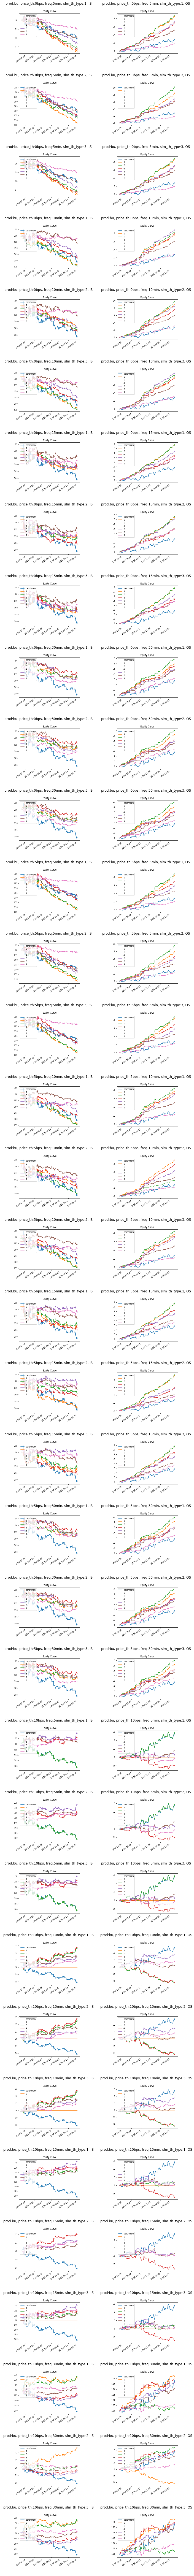

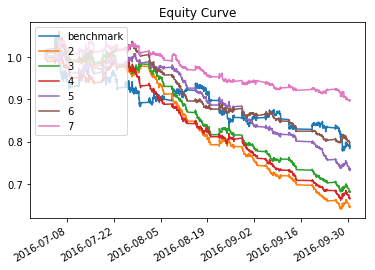

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.261545             -0.006745                -0.002024   
1               0.264563             -0.005913                -0.002060   
2               0.253601             -0.006332                -0.002539   
3               0.251383             -0.004833                -0.002670   
4               0.260200             -0.003609                -0.003160   
5               0.257790             -0.001645                -0.004373   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003134                 -0.000307             -0.014357   
1                 0.003340                 -0.000289             -0.014227   
2                 0.003647                 -0.000425             -0.018195   
3                 0.003726                 -0.000365             -0.022289   
4                 0.004581                 -0.000408             -0.023310   
5     

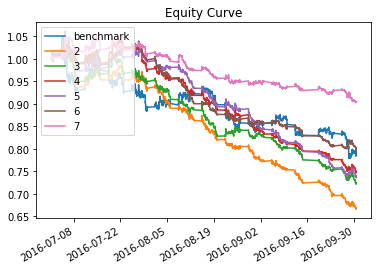

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.236344             -0.006248                -0.002926   
1               0.252328             -0.004972                -0.002356   
2               0.248492             -0.004519                -0.002986   
3               0.248919             -0.004740                -0.002772   
4               0.256899             -0.003549                -0.003299   
5               0.256886             -0.001537                -0.004491   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004334                 -0.000585             -0.017034   
1                 0.004112                 -0.000362             -0.018347   
2                 0.004033                 -0.000404             -0.020102   
3                 0.003799                 -0.000381             -0.021995   
4                 0.004677                 -0.000424             -0.023310   
5     

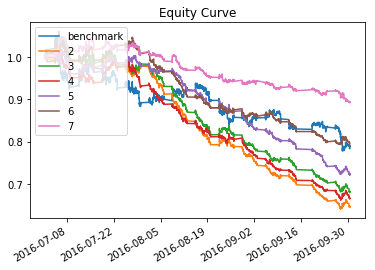

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.261545             -0.006745                -0.002024   
1               0.264563             -0.005913                -0.002060   
2               0.253601             -0.006332                -0.002539   
3               0.252308             -0.005070                -0.002760   
4               0.257816             -0.003644                -0.003206   
5               0.257245             -0.001713                -0.004445   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003134                 -0.000307             -0.014357   
1                 0.003340                 -0.000289             -0.014227   
2                 0.003647                 -0.000425             -0.018195   
3                 0.003764                 -0.000403             -0.022289   
4                 0.004587                 -0.000421             -0.023310   
5     

C:\Users\Maxcell-HomePC\QishiQR\Backtesting\Vectorized\backtest.py:18: RuntimeWarning: invalid value encountered in log
  self.result['return'] = np.log(self.result[self.price]/self.result[self.price].shift(1))


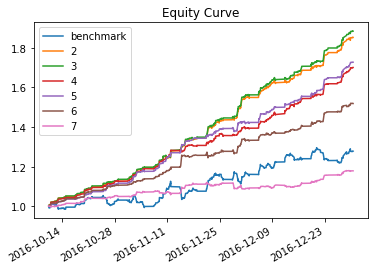

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.208408              0.010316                -0.001237   
1               0.208727              0.010598                -0.001250   
2               0.216241              0.008873                -0.001730   
3               0.215304              0.009144                -0.001823   
4               0.215166              0.007004                -0.002829   
5               0.238681              0.002756                -0.005234   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002111                  0.000412             -0.029829   
1                 0.002196                  0.000446             -0.029829   
2                 0.002752                  0.000568             -0.033563   
3                 0.003222                  0.000729             -0.027840   
4                 0.004208                  0.000900             -0.025968   
5     

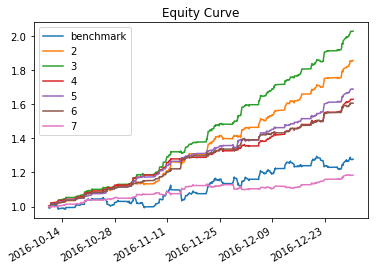

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246742              0.010362                -0.001794   
1               0.222738              0.011837                -0.001522   
2               0.218812              0.008165                -0.002095   
3               0.220043              0.008767                -0.001947   
4               0.215835              0.007941                -0.002800   
5               0.236788              0.002838                -0.005420   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003350                  0.000877             -0.031323   
1                 0.003170                  0.000791             -0.030544   
2                 0.003351                  0.000723             -0.034085   
3                 0.003321                  0.000744             -0.030538   
4                 0.004525                  0.001076             -0.024888   
5     

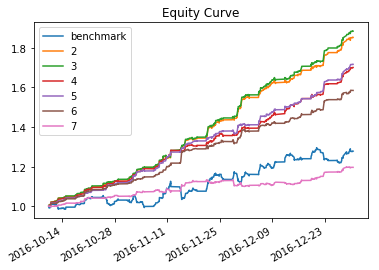

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.208408              0.010316                -0.001237   
1               0.208727              0.010598                -0.001250   
2               0.216241              0.008873                -0.001730   
3               0.218176              0.009035                -0.001899   
4               0.214579              0.007710                -0.002768   
5               0.237298              0.003007                -0.005296   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002111                  0.000412             -0.029829   
1                 0.002196                  0.000446             -0.029829   
2                 0.002752                  0.000568             -0.033563   
3                 0.003308                  0.000755             -0.030538   
4                 0.004387                  0.001016             -0.024888   
5     

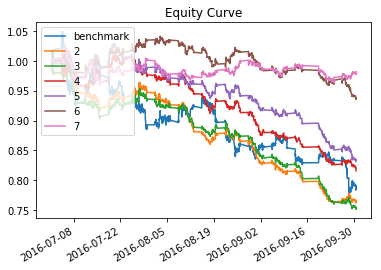

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257946             -0.004186                -0.002561   
1               0.262535             -0.004412                -0.002450   
2               0.254896             -0.003133                -0.002996   
3               0.271163             -0.002846                -0.003364   
4               0.264016             -0.001005                -0.003860   
5               0.244230             -0.000312                -0.005333   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004262                 -0.000335             -0.015723   
1                 0.004092                 -0.000331             -0.015839   
2                 0.004581                 -0.000332             -0.022149   
3                 0.004966                 -0.000349             -0.025103   
4                 0.005413                 -0.000167             -0.030478   
5     

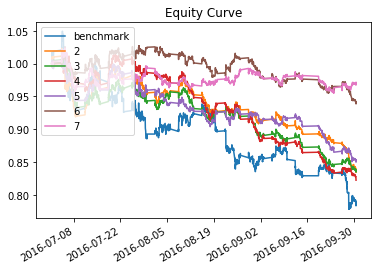

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.251924             -0.002775                -0.003777   
1               0.260479             -0.002767                -0.002821   
2               0.247039             -0.003007                -0.003043   
3               0.265418             -0.002490                -0.003468   
4               0.264142             -0.000946                -0.004011   
5               0.239903             -0.000470                -0.005443   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005651                 -0.000469             -0.033875   
1                 0.005244                 -0.000303             -0.024670   
2                 0.004704                 -0.000327             -0.022149   
3                 0.005126                 -0.000337             -0.029712   
4                 0.005507                 -0.000166             -0.030478   
5     

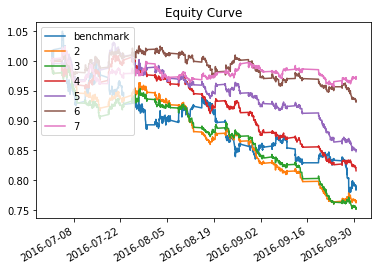

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257946             -0.004186                -0.002561   
1               0.262535             -0.004412                -0.002450   
2               0.254896             -0.003133                -0.002996   
3               0.262663             -0.002533                -0.003372   
4               0.263685             -0.001082                -0.003951   
5               0.238831             -0.000443                -0.005401   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004262                 -0.000335             -0.015723   
1                 0.004092                 -0.000331             -0.015839   
2                 0.004581                 -0.000332             -0.022149   
3                 0.005019                 -0.000320             -0.025103   
4                 0.005420                 -0.000184             -0.030478   
5     

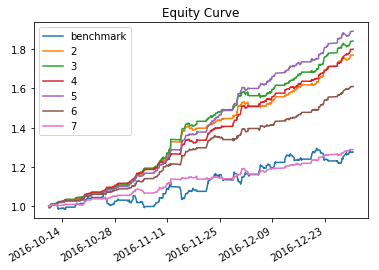

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.211582              0.009550                -0.001668   
1               0.208059              0.010204                -0.001575   
2               0.218110              0.009820                -0.001946   
3               0.220223              0.010652                -0.002171   
4               0.215233              0.007960                -0.003088   
5               0.248000              0.004245                -0.006012   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002969                  0.000689             -0.022628   
1                 0.002887                  0.000689             -0.022807   
2                 0.003793                  0.001008             -0.024707   
3                 0.004330                  0.001318             -0.026456   
4                 0.005233                  0.001390             -0.028353   
5     

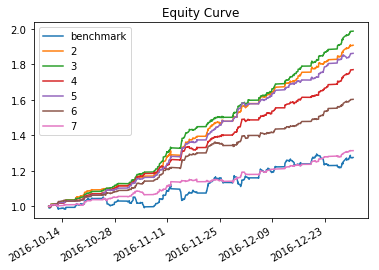

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.219285              0.010790                -0.002457   
1               0.209147              0.011462                -0.001830   
2               0.221076              0.009538                -0.002008   
3               0.221345              0.010382                -0.002297   
4               0.215362              0.007886                -0.003135   
5               0.246228              0.004569                -0.006049   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001739             -0.027916   
1                 0.003936                  0.001162             -0.026040   
2                 0.003798                  0.000991             -0.026580   
3                 0.004462                  0.001368             -0.027690   
4                 0.005345                  0.001426             -0.028353   
5     

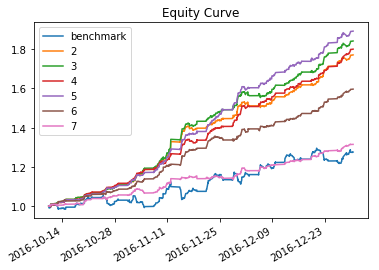

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.211582              0.009550                -0.001668   
1               0.208059              0.010204                -0.001575   
2               0.218110              0.009820                -0.001946   
3               0.221251              0.010651                -0.002200   
4               0.216069              0.007818                -0.003108   
5               0.246102              0.004578                -0.006025   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002969                  0.000689             -0.022628   
1                 0.002887                  0.000689             -0.022807   
2                 0.003793                  0.001008             -0.024707   
3                 0.004370                  0.001334             -0.027690   
4                 0.005239                  0.001376             -0.028353   
5     

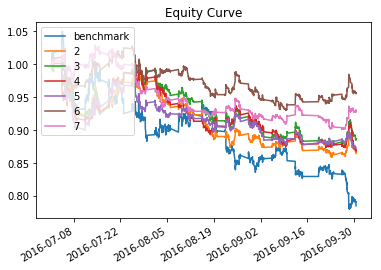

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.253495             -0.002225                -0.002866   
1               0.266285             -0.001852                -0.002712   
2               0.279041             -0.002136                -0.003378   
3               0.281731             -0.002091                -0.003606   
4               0.250234             -0.000666                -0.004212   
5               0.261235             -0.001135                -0.005982   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004668                 -0.000238             -0.025693   
1                 0.004542                 -0.000179             -0.025059   
2                 0.004799                 -0.000266             -0.029209   
3                 0.005568                 -0.000312             -0.028394   
4                 0.006587                 -0.000139             -0.034123   
5     

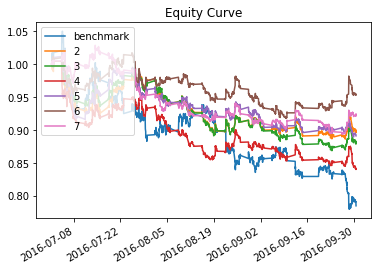

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.254894             -0.001659                -0.003026   
1               0.257849             -0.001961                -0.003063   
2               0.269965             -0.002664                -0.003702   
3               0.278613             -0.001752                -0.003601   
4               0.248907             -0.000700                -0.004256   
5               0.261995             -0.001239                -0.006035   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004875                 -0.000191             -0.026131   
1                 0.005031                 -0.000231             -0.025308   
2                 0.005066                 -0.000382             -0.029209   
3                 0.005638                 -0.000270             -0.028394   
4                 0.006685                 -0.000155             -0.034123   
5     

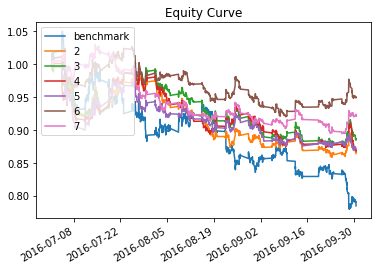

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.253495             -0.002225                -0.002866   
1               0.266285             -0.001852                -0.002712   
2               0.279041             -0.002136                -0.003378   
3               0.281147             -0.002114                -0.003598   
4               0.250821             -0.000770                -0.004248   
5               0.261700             -0.001249                -0.006004   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004668                 -0.000238             -0.025693   
1                 0.004542                 -0.000179             -0.025059   
2                 0.004799                 -0.000266             -0.029209   
3                 0.005573                 -0.000316             -0.028394   
4                 0.006526                 -0.000163             -0.034123   
5     

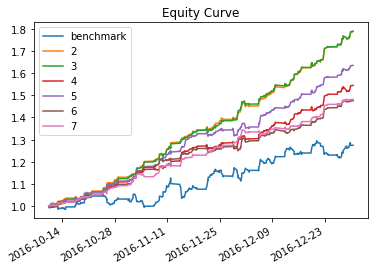

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.205758              0.009737                -0.002026   
1               0.206653              0.009755                -0.001949   
2               0.221294              0.007295                -0.002607   
3               0.214003              0.008243                -0.002692   
4               0.223348              0.006522                -0.003605   
5               0.240195              0.006582                -0.005675   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003587                  0.000979             -0.030978   
1                 0.003409                  0.000917             -0.031936   
2                 0.003707                  0.000895             -0.028751   
3                 0.004180                  0.001170             -0.030119   
4                 0.004951                  0.001232             -0.030316   
5     

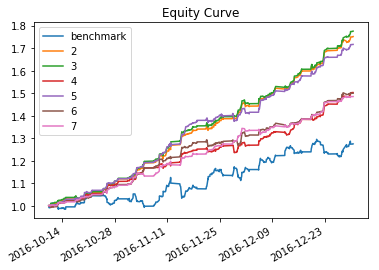

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.210127              0.009375                -0.002125   
1               0.208825              0.009603                -0.002109   
2               0.219314              0.006823                -0.002901   
3               0.211097              0.009045                -0.002620   
4               0.224875              0.006785                -0.003639   
5               0.239799              0.006612                -0.005705   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003698                  0.000990             -0.027781   
1                 0.003807                  0.001048             -0.027695   
2                 0.003939                  0.000935             -0.028612   
3                 0.004364                  0.001328             -0.026073   
4                 0.005093                  0.001323             -0.029102   
5     

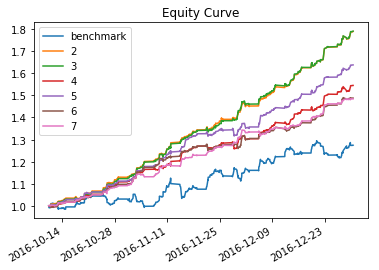

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.205758              0.009737                -0.002026   
1               0.206653              0.009755                -0.001949   
2               0.221294              0.007295                -0.002607   
3               0.213917              0.008265                -0.002692   
4               0.223868              0.006656                -0.003587   
5               0.239709              0.006609                -0.005705   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003587                  0.000979             -0.030978   
1                 0.003409                  0.000917             -0.031936   
2                 0.003707                  0.000895             -0.028751   
3                 0.004180                  0.001174             -0.030119   
4                 0.004982                  0.001266             -0.030055   
5     

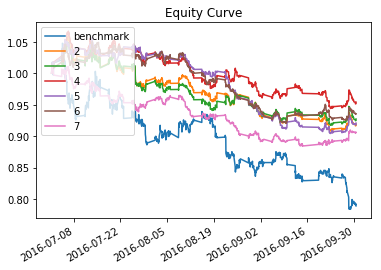

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.255865             -0.001275                -0.003576   
1               0.254125             -0.001138                -0.003619   
2               0.248345             -0.000695                -0.003747   
3               0.248937             -0.001255                -0.004229   
4               0.244905             -0.001009                -0.004856   
5               0.270927             -0.001520                -0.006861   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006703                 -0.000217             -0.016640   
1                 0.006705                 -0.000189             -0.017562   
2                 0.006829                 -0.000115             -0.028626   
3                 0.007126                 -0.000265             -0.025348   
4                 0.007648                 -0.000268             -0.030757   
5     

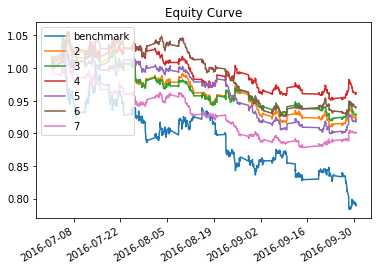

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.254838             -0.001186                -0.003595   
1               0.254450             -0.001101                -0.003615   
2               0.243381             -0.000554                -0.003761   
3               0.248723             -0.001257                -0.004445   
4               0.251423             -0.000934                -0.004991   
5               0.263416             -0.001602                -0.007193   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006747                 -0.000205             -0.015877   
1                 0.006676                 -0.000185             -0.017562   
2                 0.006849                 -0.000092             -0.027907   
3                 0.007442                 -0.000286             -0.030052   
4                 0.008053                 -0.000255             -0.030757   
5     

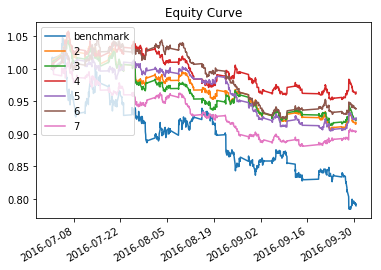

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.255411             -0.001307                -0.003577   
1               0.252941             -0.001212                -0.003616   
2               0.243930             -0.000534                -0.003761   
3               0.250393             -0.001197                -0.004400   
4               0.247490             -0.000957                -0.004981   
5               0.263624             -0.001561                -0.007174   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006682                 -0.000223             -0.016640   
1                 0.006676                 -0.000202             -0.017562   
2                 0.006861                 -0.000088             -0.027907   
3                 0.007354                 -0.000270             -0.030052   
4                 0.008006                 -0.000259             -0.030757   
5     

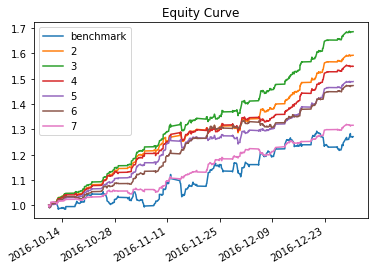

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.207296              0.007797                -0.003224   
1               0.211415              0.008742                -0.002968   
2               0.224082              0.007332                -0.003457   
3               0.223433              0.006667                -0.003709   
4               0.228121              0.006480                -0.004219   
5               0.255944              0.004601                -0.006273   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005014                  0.001361             -0.038095   
1                 0.005089                  0.001496             -0.035744   
2                 0.005313                  0.001402             -0.035752   
3                 0.005501                  0.001385             -0.033203   
4                 0.006754                  0.001795             -0.027850   
5     

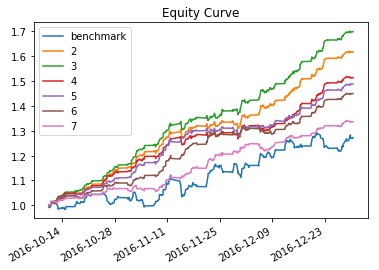

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.210606              0.008063                -0.003192   
1               0.211508              0.008873                -0.002934   
2               0.224946              0.006947                -0.003715   
3               0.218914              0.006669                -0.003787   
4               0.231338              0.006220                -0.004394   
5               0.261720              0.004862                -0.006676   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001423             -0.035744   
1                 0.005100                  0.001520             -0.035744   
2                 0.005373                  0.001399             -0.035752   
3                 0.005819                  0.001493             -0.027520   
4                 0.006949                  0.001797             -0.028431   
5     

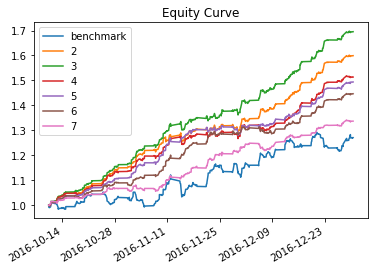

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.207888              0.007868                -0.003216   
1               0.212087              0.008838                -0.002946   
2               0.224946              0.006947                -0.003715   
3               0.218195              0.006722                -0.003772   
4               0.230546              0.006180                -0.004387   
5               0.261676              0.004866                -0.006673   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005014                  0.001377             -0.038095   
1                 0.005089                  0.001514             -0.035744   
2                 0.005373                  0.001399             -0.035752   
3                 0.005727                  0.001483             -0.027520   
4                 0.006913                  0.001778             -0.028431   
5     

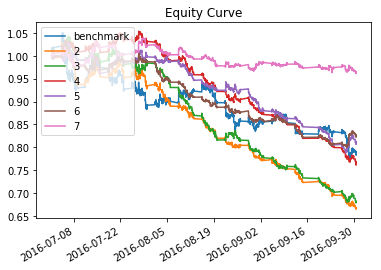

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.236344             -0.006248                -0.002926   
1               0.264563             -0.005913                -0.002060   
2               0.244787             -0.004188                -0.002976   
3               0.259976             -0.003291                -0.002929   
4               0.260630             -0.003006                -0.003711   
5               0.254517             -0.000553                -0.004906   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004334                 -0.000585             -0.017034   
1                 0.003340                 -0.000289             -0.014227   
2                 0.003927                 -0.000367             -0.021576   
3                 0.003921                 -0.000291             -0.023156   
4                 0.005133                 -0.000439             -0.025614   
5     

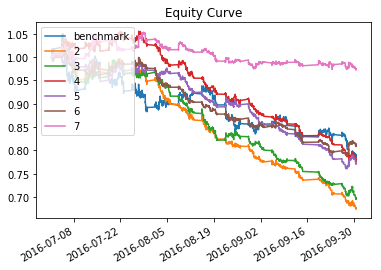

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.241689             -0.006050                -0.002986   
1               0.254041             -0.005543                -0.002236   
2               0.246118             -0.003905                -0.003170   
3               0.254398             -0.004011                -0.003178   
4               0.265220             -0.003275                -0.003879   
5               0.252560             -0.000372                -0.004987   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004343                 -0.000589             -0.019707   
1                 0.003866                 -0.000351             -0.014984   
2                 0.003955                 -0.000373             -0.023382   
3                 0.004173                 -0.000396             -0.021078   
4                 0.005253                 -0.000514             -0.030952   
5     

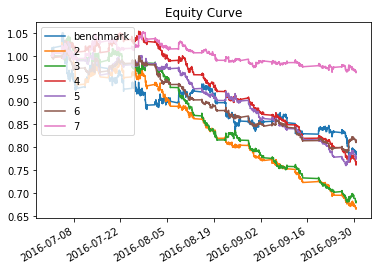

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.236344             -0.006248                -0.002926   
1               0.264563             -0.005913                -0.002060   
2               0.244787             -0.004188                -0.002976   
3               0.259358             -0.003930                -0.003058   
4               0.261744             -0.003227                -0.003748   
5               0.252251             -0.000525                -0.004933   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004334                 -0.000585             -0.017034   
1                 0.003340                 -0.000289             -0.014227   
2                 0.003927                 -0.000367             -0.021576   
3                 0.004007                 -0.000366             -0.023156   
4                 0.005169                 -0.000481             -0.025695   
5     

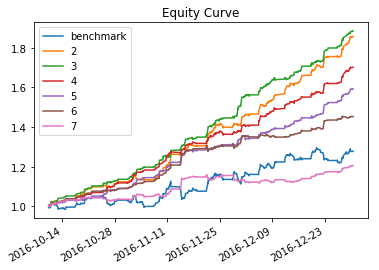

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246742              0.010362                -0.001794   
1               0.208727              0.010598                -0.001250   
2               0.217168              0.008886                -0.001959   
3               0.215488              0.007780                -0.002168   
4               0.215735              0.006256                -0.003390   
5               0.254313              0.003132                -0.006522   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003350                  0.000877             -0.031323   
1                 0.002196                  0.000446             -0.029829   
2                 0.003476                  0.000816             -0.028658   
3                 0.003449                  0.000746             -0.028264   
4                 0.004862                  0.001065             -0.026611   
5     

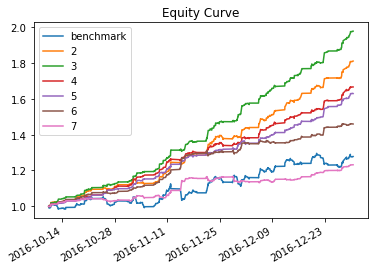

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246261              0.009919                -0.001858   
1               0.218928              0.011385                -0.001433   
2               0.213588              0.008526                -0.002060   
3               0.215215              0.008151                -0.002284   
4               0.223894              0.006330                -0.003462   
5               0.252139              0.003505                -0.006619   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003393                  0.000867             -0.031323   
1                 0.002761                  0.000633             -0.032267   
2                 0.003597                  0.000843             -0.028658   
3                 0.003711                  0.000873             -0.029357   
4                 0.005021                  0.001124             -0.028107   
5     

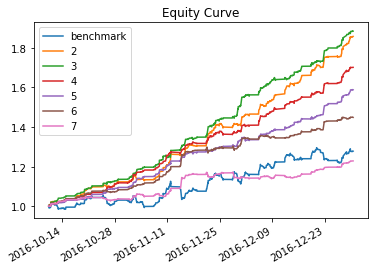

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.246742              0.010362                -0.001794   
1               0.208727              0.010598                -0.001250   
2               0.217168              0.008886                -0.001959   
3               0.216359              0.007733                -0.002255   
4               0.220699              0.006215                -0.003423   
5               0.252619              0.003460                -0.006602   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003350                  0.000877             -0.031323   
1                 0.002196                  0.000446             -0.029829   
2                 0.003476                  0.000816             -0.028658   
3                 0.003550                  0.000782             -0.029357   
4                 0.004908                  0.001068             -0.026611   
5     

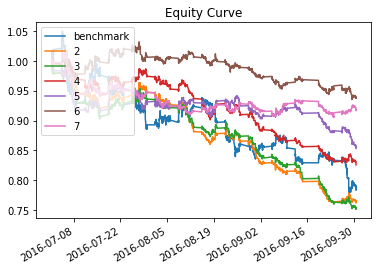

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257946             -0.004186                -0.002561   
1               0.262535             -0.004412                -0.002450   
2               0.252113             -0.002944                -0.003030   
3               0.269520             -0.002441                -0.003650   
4               0.250922             -0.000974                -0.004392   
5               0.245522             -0.001312                -0.005944   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004262                 -0.000335             -0.015723   
1                 0.004092                 -0.000331             -0.015839   
2                 0.004495                 -0.000305             -0.020907   
3                 0.005465                 -0.000362             -0.027707   
4                 0.005911                 -0.000208             -0.033104   
5     

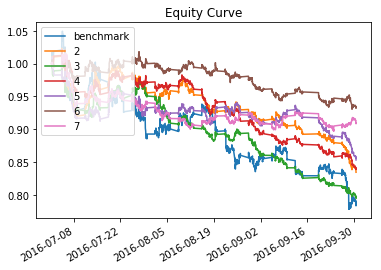

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.251924             -0.002775                -0.003777   
1               0.256710             -0.003543                -0.004120   
2               0.262758             -0.002698                -0.003459   
3               0.267284             -0.002438                -0.003674   
4               0.252098             -0.001055                -0.004538   
5               0.245324             -0.001448                -0.006047   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005651                 -0.000469             -0.033875   
1                 0.004754                 -0.000541             -0.031202   
2                 0.005119                 -0.000367             -0.034545   
3                 0.005532                 -0.000368             -0.029189   
4                 0.005922                 -0.000234             -0.034260   
5     

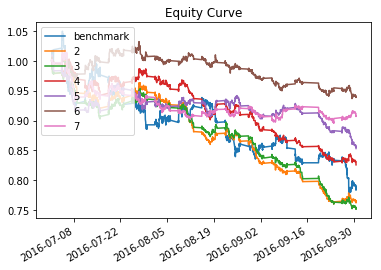

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.257946             -0.004186                -0.002561   
1               0.262535             -0.004412                -0.002450   
2               0.252113             -0.002944                -0.003030   
3               0.269520             -0.002441                -0.003650   
4               0.251498             -0.000951                -0.004489   
5               0.245762             -0.001477                -0.006021   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004262                 -0.000335             -0.015723   
1                 0.004092                 -0.000331             -0.015839   
2                 0.004495                 -0.000305             -0.020907   
3                 0.005465                 -0.000362             -0.027707   
4                 0.005956                 -0.000207             -0.033104   
5     

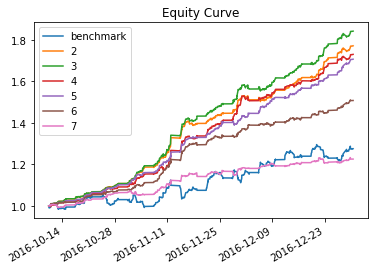

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.211582              0.009550                -0.001668   
1               0.208059              0.010204                -0.001575   
2               0.220738              0.009160                -0.001978   
3               0.212154              0.008928                -0.002729   
4               0.238897              0.006862                -0.004226   
5               0.266592              0.003412                -0.008022   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002969                  0.000689             -0.022628   
1                 0.002887                  0.000689             -0.022807   
2                 0.003507                  0.000871             -0.022149   
3                 0.005028                  0.001396             -0.022843   
4                 0.006371                  0.001772             -0.031596   
5     

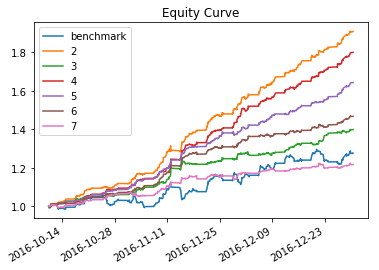

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.219285              0.010790                -0.002457   
1               0.212330              0.005609                -0.002869   
2               0.225414              0.009813                -0.002241   
3               0.215939              0.008288                -0.002906   
4               0.240987              0.006402                -0.004441   
5               0.267240              0.003284                -0.008168   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001739             -0.027916   
1                 0.003799                  0.000739             -0.027011   
2                 0.004391                  0.001314             -0.022556   
3                 0.005057                  0.001340             -0.024931   
4                 0.006566                  0.001731             -0.031596   
5     

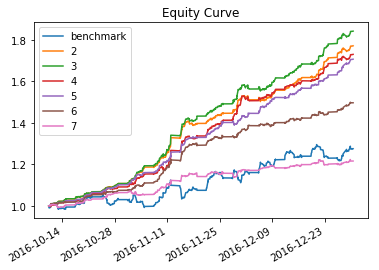

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.211582              0.009550                -0.001668   
1               0.208059              0.010204                -0.001575   
2               0.220738              0.009160                -0.001978   
3               0.212154              0.008928                -0.002729   
4               0.240016              0.006741                -0.004280   
5               0.267240              0.003284                -0.008168   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002969                  0.000689             -0.022628   
1                 0.002887                  0.000689             -0.022807   
2                 0.003507                  0.000871             -0.022149   
3                 0.005028                  0.001396             -0.022843   
4                 0.006435                  0.001766             -0.031596   
5     

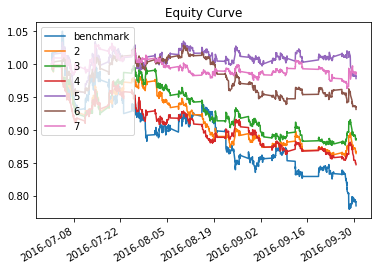

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.253495             -0.002225                -0.002866   
1               0.266285             -0.001852                -0.002712   
2               0.246536             -0.002541                -0.003471   
3               0.277561             -0.000292                -0.004032   
4               0.260025             -0.001072                -0.004944   
5               0.254931             -0.000202                -0.006565   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004668                 -0.000238             -0.025693   
1                 0.004542                 -0.000179             -0.025059   
2                 0.004708                 -0.000320             -0.030097   
3                 0.006161                 -0.000054             -0.029099   
4                 0.007139                 -0.000287             -0.034565   
5     

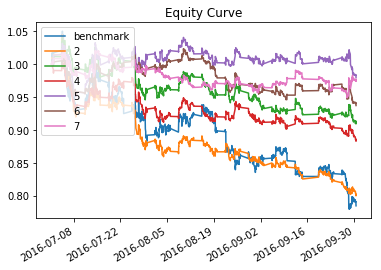

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.263655             -0.003394                -0.004440   
1               0.246725             -0.001422                -0.003271   
2               0.236597             -0.001892                -0.003583   
3               0.274523             -0.000272                -0.004083   
4               0.259613             -0.000975                -0.005055   
5               0.253846             -0.000375                -0.006849   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006781                 -0.000751             -0.035319   
1                 0.006153                 -0.000213             -0.026677   
2                 0.005444                 -0.000299             -0.027906   
3                 0.006422                 -0.000048             -0.029099   
4                 0.007226                 -0.000272             -0.038029   
5     

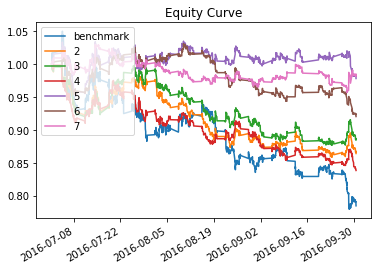

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.253495             -0.002225                -0.002866   
1               0.266285             -0.001852                -0.002712   
2               0.247450             -0.002706                -0.003476   
3               0.277561             -0.000292                -0.004032   
4               0.263571             -0.001256                -0.005038   
5               0.254592             -0.000250                -0.006712   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.004668                 -0.000238             -0.025693   
1                 0.004542                 -0.000179             -0.025059   
2                 0.004756                 -0.000344             -0.030097   
3                 0.006161                 -0.000054             -0.029099   
4                 0.007099                 -0.000348             -0.038029   
5     

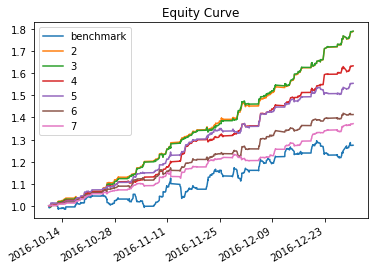

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.205758              0.009737                -0.002026   
1               0.206653              0.009755                -0.001949   
2               0.219490              0.008219                -0.002239   
3               0.226572              0.007384                -0.003264   
4               0.236842              0.005791                -0.004778   
5               0.255395              0.005288                -0.007316   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003587                  0.000979             -0.030978   
1                 0.003409                  0.000917             -0.031936   
2                 0.003835                  0.000956             -0.027715   
3                 0.004958                  0.001341             -0.031633   
4                 0.006551                  0.001606             -0.033746   
5     

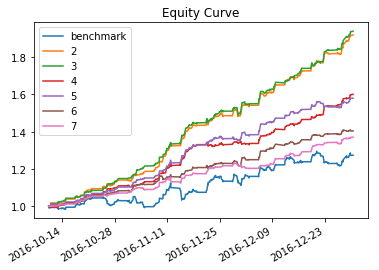

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.221251              0.010921                -0.003156   
1               0.213856              0.011097                -0.002301   
2               0.228489              0.007876                -0.002863   
3               0.223720              0.007663                -0.003269   
4               0.236122              0.005689                -0.004890   
5               0.255559              0.005279                -0.007412   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006134                  0.002424             -0.026568   
1                 0.004769                  0.001594             -0.025779   
2                 0.004513                  0.001180             -0.028741   
3                 0.005078                  0.001424             -0.028047   
4                 0.006694                  0.001630             -0.033805   
5     

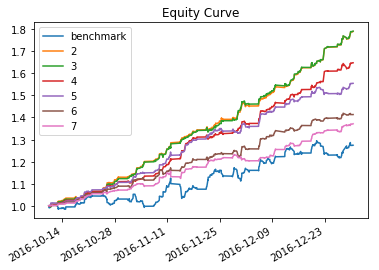

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.205758              0.009737                -0.002026   
1               0.206653              0.009755                -0.001949   
2               0.219511              0.008361                -0.002234   
3               0.226572              0.007384                -0.003264   
4               0.236842              0.005791                -0.004789   
5               0.255536              0.005282                -0.007410   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.003587                  0.000979             -0.030978   
1                 0.003409                  0.000917             -0.031936   
2                 0.003866                  0.000982             -0.027715   
3                 0.004958                  0.001341             -0.031633   
4                 0.006549                  0.001612             -0.033746   
5     

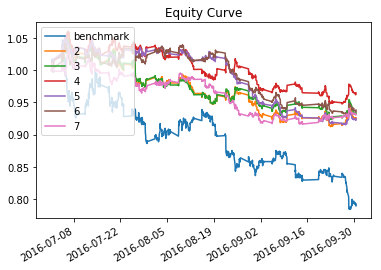

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.255270             -0.001154                -0.003594   
1               0.255627             -0.001026                -0.003618   
2               0.245878             -0.000515                -0.003744   
3               0.245917             -0.001181                -0.004179   
4               0.245770             -0.000961                -0.005128   
5               0.244777             -0.001087                -0.007663   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006768                 -0.000199             -0.015877   
1                 0.006705                 -0.000172             -0.017562   
2                 0.006922                 -0.000080             -0.029182   
3                 0.007225                 -0.000250             -0.028039   
4                 0.007983                 -0.000280             -0.030300   
5     

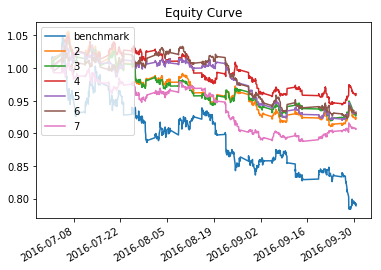

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.254838             -0.001186                -0.003595   
1               0.254450             -0.001101                -0.003615   
2               0.244048             -0.000583                -0.003755   
3               0.246855             -0.001055                -0.004287   
4               0.248451             -0.001090                -0.005163   
5               0.252084             -0.001500                -0.007926   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006747                 -0.000205             -0.015877   
1                 0.006676                 -0.000185             -0.017562   
2                 0.006928                 -0.000093             -0.029182   
3                 0.007523                 -0.000240             -0.028240   
4                 0.008213                 -0.000318             -0.030300   
5     

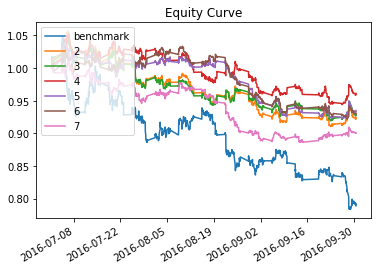

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.254838             -0.001186                -0.003595   
1               0.254450             -0.001101                -0.003615   
2               0.244621             -0.000577                -0.003757   
3               0.247540             -0.001016                -0.004273   
4               0.248346             -0.001102                -0.005175   
5               0.250910             -0.001611                -0.007918   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006747                 -0.000205             -0.015877   
1                 0.006676                 -0.000185             -0.017562   
2                 0.006930                 -0.000091             -0.029182   
3                 0.007535                 -0.000229             -0.028240   
4                 0.008151                 -0.000321             -0.030300   
5     

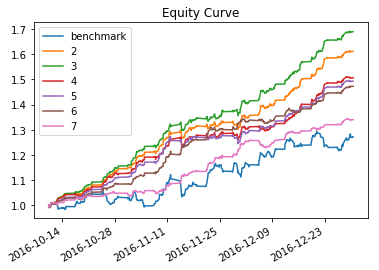

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.210016              0.007992                -0.003200   
1               0.210840              0.008777                -0.002956   
2               0.221326              0.006864                -0.003643   
3               0.224367              0.006715                -0.003791   
4               0.227853              0.006478                -0.004350   
5               0.257027              0.004897                -0.007309   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001407             -0.035744   
1                 0.005100                  0.001501             -0.035744   
2                 0.005407                  0.001377             -0.035752   
3                 0.005623                  0.001422             -0.033615   
4                 0.007301                  0.001935             -0.024978   
5     

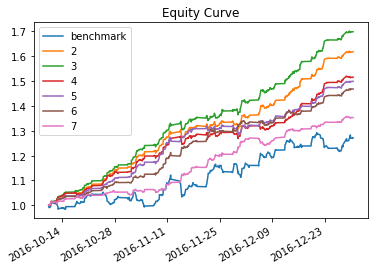

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.210606              0.008063                -0.003192   
1               0.211508              0.008873                -0.002934   
2               0.222029              0.006965                -0.003628   
3               0.218549              0.006778                -0.003761   
4               0.227799              0.006432                -0.004404   
5               0.260155              0.005067                -0.007379   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001423             -0.035744   
1                 0.005100                  0.001520             -0.035744   
2                 0.005421                  0.001399             -0.035752   
3                 0.005829                  0.001492             -0.027520   
4                 0.007293                  0.001934             -0.024978   
5     

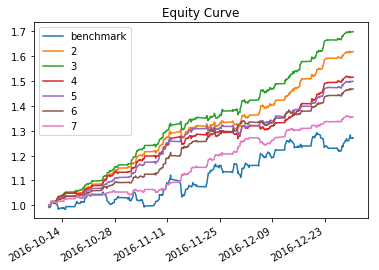

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.210606              0.008063                -0.003192   
1               0.211508              0.008873                -0.002934   
2               0.222029              0.006965                -0.003628   
3               0.218549              0.006778                -0.003761   
4               0.227799              0.006432                -0.004404   
5               0.260848              0.005095                -0.007467   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.005061                  0.001423             -0.035744   
1                 0.005100                  0.001520             -0.035744   
2                 0.005421                  0.001399             -0.035752   
3                 0.005829                  0.001492             -0.027520   
4                 0.007293                  0.001934             -0.024978   
5     

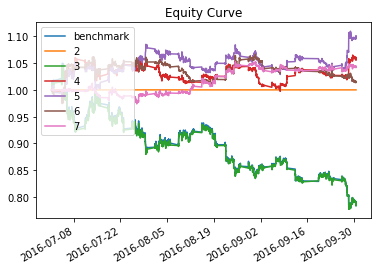

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.251663             -0.003589                -0.229719   
2               0.247352              0.000896                -0.005243   
3               0.248646              0.001487                -0.005667   
4               0.249131              0.000282                -0.007242   
5               0.231995              0.000694                -0.015432   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.114860             -0.229719   
2                 0.007588                  0.000310             -0.032025   
3                 0.009550                  0.000728             -0.033077   
4                 0.012528                  0.000285             -0.041077   
5     

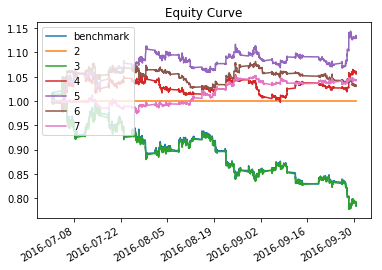

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.251663             -0.003589                -0.229719   
2               0.247352              0.000896                -0.005243   
3               0.246598              0.001958                -0.005497   
4               0.247664              0.000534                -0.007241   
5               0.231995              0.000694                -0.015432   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.114860             -0.229719   
2                 0.007588                  0.000310             -0.032025   
3                 0.009538                  0.000974             -0.032965   
4                 0.012831                  0.000505             -0.040202   
5     

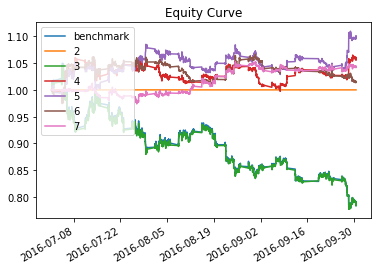

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.251663             -0.003589                -0.229719   
2               0.247352              0.000896                -0.005243   
3               0.248646              0.001487                -0.005667   
4               0.249131              0.000282                -0.007242   
5               0.231995              0.000694                -0.015432   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.114860             -0.229719   
2                 0.007588                  0.000310             -0.032025   
3                 0.009550                  0.000728             -0.033077   
4                 0.012528                  0.000285             -0.041077   
5     

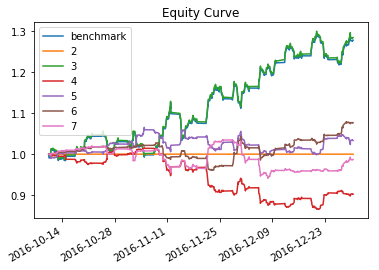

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309362              0.004247                      NaN   
2               0.272190             -0.001678                -0.008243   
3               0.261282              0.000585                -0.007706   
4               0.268812              0.001257                -0.012888   
5               0.297637             -0.000194                -0.025475   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.254845                  0.127423              0.000000   
2                 0.006378                 -0.000686             -0.053417   
3                 0.007052                  0.000229             -0.046792   
4                 0.012362                  0.001125             -0.055699   
5     

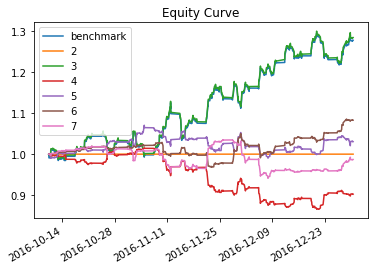

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309362              0.004247                      NaN   
2               0.272190             -0.001678                -0.008243   
3               0.259376              0.000534                -0.007865   
4               0.268934              0.001352                -0.013081   
5               0.297637             -0.000194                -0.025475   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.254845                  0.127423              0.000000   
2                 0.006378                 -0.000686             -0.053417   
3                 0.007218                  0.000256             -0.046792   
4                 0.012562                  0.001218             -0.055699   
5     

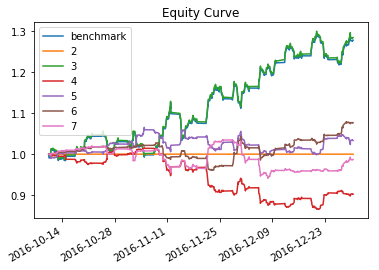

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309362              0.004247                      NaN   
2               0.272190             -0.001678                -0.008243   
3               0.261282              0.000585                -0.007706   
4               0.268812              0.001257                -0.012888   
5               0.297637             -0.000194                -0.025475   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.254845                  0.127423              0.000000   
2                 0.006378                 -0.000686             -0.053417   
3                 0.007052                  0.000229             -0.046792   
4                 0.012362                  0.001125             -0.055699   
5     

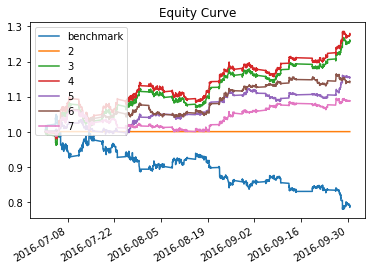

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.248779              0.003642                      NaN   
2               0.247376              0.003868                      NaN   
3               0.247829              0.002285                -0.009249   
4               0.256245              0.002085                -0.009366   
5               0.235966              0.001353                -0.016545   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.233071                  0.116536              0.000000   
2                 0.247548                  0.123774              0.000000   
3                 0.014454                  0.002261             -0.040402   
4                 0.017788                  0.003014             -0.048558   
5     

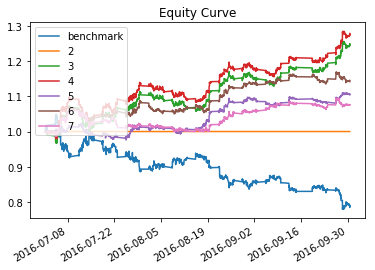

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.243950              0.003497                      NaN   
2               0.247391              0.003860                      NaN   
3               0.244561              0.001613                -0.010081   
4               0.260289              0.002113                -0.010243   
5               0.237752              0.001183                -0.017089   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.223822                  0.111911              0.000000   
2                 0.247009                  0.123504              0.000000   
3                 0.014765                  0.001780             -0.043917   
4                 0.017317                  0.003213             -0.048558   
5     

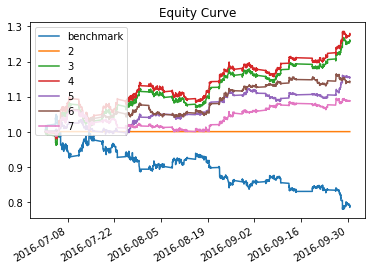

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.248779              0.003642                      NaN   
2               0.247376              0.003868                      NaN   
3               0.247829              0.002285                -0.009249   
4               0.256245              0.002085                -0.009366   
5               0.235966              0.001353                -0.016545   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.233071                  0.116536              0.000000   
2                 0.247548                  0.123774              0.000000   
3                 0.014454                  0.002261             -0.040402   
4                 0.017788                  0.003014             -0.048558   
5     

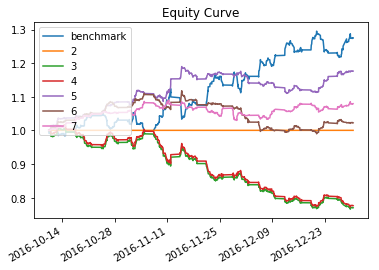

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.310189             -0.004319                -0.259120   
2               0.309512             -0.004183                -0.251008   
3               0.264360              0.002731                -0.010504   
4               0.287654              0.000394                -0.017119   
5               0.299979              0.001285                -0.024766   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.129560             -0.259120   
2                      NaN                 -0.125504             -0.251008   
3                 0.013056                  0.002390             -0.039017   
4                 0.014913                  0.000386             -0.067790   
5     

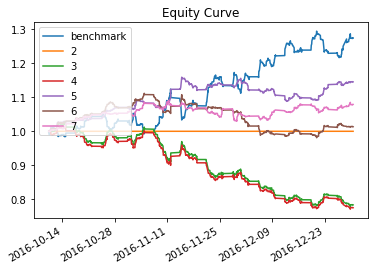

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309030             -0.004031                -0.241886   
2               0.309137             -0.004210                -0.252600   
3               0.270091              0.002292                -0.011208   
4               0.287563              0.000248                -0.017052   
5               0.299979              0.001285                -0.024766   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.120943             -0.241886   
2                      NaN                 -0.126300             -0.252600   
3                 0.013163                  0.002205             -0.040524   
4                 0.014705                  0.000135             -0.067790   
5     

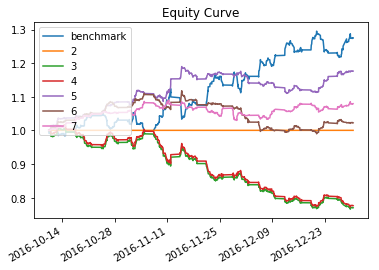

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.310189             -0.004319                -0.259120   
2               0.309512             -0.004183                -0.251008   
3               0.264360              0.002731                -0.010504   
4               0.287654              0.000394                -0.017119   
5               0.299979              0.001285                -0.024766   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                 -0.129560             -0.259120   
2                      NaN                 -0.125504             -0.251008   
3                 0.013056                  0.002390             -0.039017   
4                 0.014913                  0.000386             -0.067790   
5     

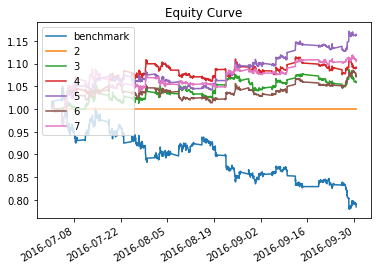

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.238963              0.000942                -0.011026   
2               0.260840              0.001414                -0.007526   
3               0.246680              0.002413                -0.007814   
4               0.261671              0.001132                -0.010963   
5               0.247987              0.001594                -0.011636   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.016605                  0.001368             -0.054115   
2                 0.010985                  0.000965             -0.036687   
3                 0.012617                  0.001967             -0.030815   
4                 0.015050                  0.001396             -0.049382   
5     

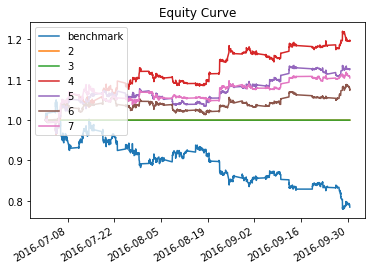

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.253300              0.002868                -0.007868   
3               0.247888              0.001918                -0.008274   
4               0.262183              0.001179                -0.011056   
5               0.247987              0.001594                -0.011636   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.013940                  0.003082             -0.029308   
3                 0.012504                  0.001601             -0.034558   
4                 0.015016                  0.001465             -0.049382   
5     

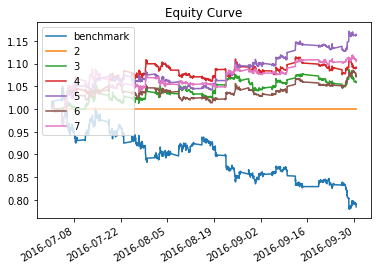

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.238963              0.000942                -0.011026   
2               0.260840              0.001414                -0.007526   
3               0.246680              0.002413                -0.007814   
4               0.261671              0.001132                -0.010963   
5               0.247987              0.001594                -0.011636   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.016605                  0.001368             -0.054115   
2                 0.010985                  0.000965             -0.036687   
3                 0.012617                  0.001967             -0.030815   
4                 0.015050                  0.001396             -0.049382   
5     

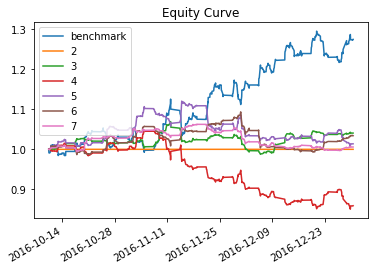

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309528              0.000679                -0.018329   
2               0.252299             -0.002476                -0.012472   
3               0.281384              0.000270                -0.011871   
4               0.294801              0.000584                -0.018449   
5               0.297467              0.000104                -0.030429   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.016474                  0.001542             -0.053374   
2                 0.008361                 -0.001983             -0.055122   
3                 0.011059                  0.000270             -0.057724   
4                 0.017272                  0.000900             -0.074003   
5     

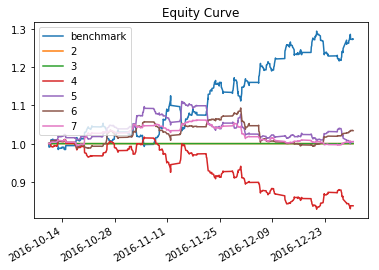

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.293511             -0.002901                -0.016000   
3               0.281737              0.000126                -0.012055   
4               0.294801              0.000584                -0.018449   
5               0.297699              0.000094                -0.030502   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.010383                 -0.004080             -0.065371   
3                 0.010928                  0.000146             -0.057724   
4                 0.017272                  0.000900             -0.074003   
5     

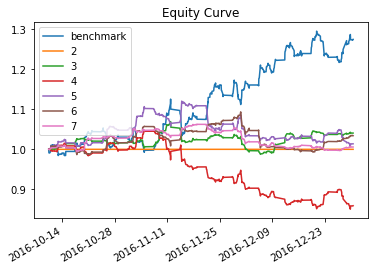

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.309528              0.000679                -0.018329   
2               0.252299             -0.002476                -0.012472   
3               0.281384              0.000270                -0.011871   
4               0.294801              0.000584                -0.018449   
5               0.297467              0.000104                -0.030429   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.016474                  0.001542             -0.053374   
2                 0.008361                 -0.001983             -0.055122   
3                 0.011059                  0.000270             -0.057724   
4                 0.017272                  0.000900             -0.074003   
5     

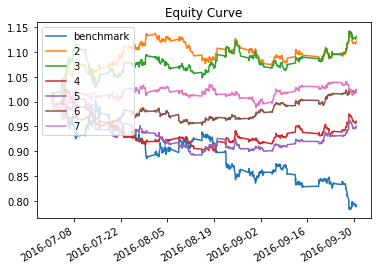

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.247585              0.001833                -0.004153   
1               0.275730              0.001979                -0.005985   
2               0.257162             -0.000592                -0.005621   
3               0.259628             -0.000752                -0.007616   
4               0.239685              0.000389                -0.011037   
5               0.251902              0.000358                -0.016117   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.009904                  0.000724             -0.018994   
1                 0.016045                  0.001582             -0.023318   
2                 0.008321                 -0.000193             -0.033059   
3                 0.010268                 -0.000422             -0.033297   
4                 0.012892                  0.000711             -0.054854   
5     

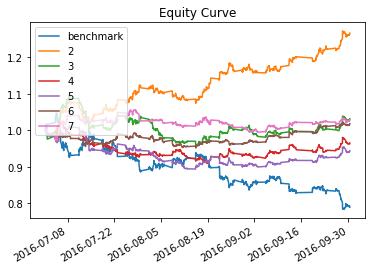

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.247126              0.003748                      NaN   
1               0.294369              0.000535                -0.009073   
2               0.255793             -0.000515                -0.005806   
3               0.256895             -0.000857                -0.007726   
4               0.250948              0.000306                -0.011507   
5               0.261417              0.000484                -0.016176   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.239889                  0.119945              0.000000   
1                 0.020218                  0.000561             -0.030500   
2                 0.008633                 -0.000174             -0.033059   
3                 0.010298                 -0.000461             -0.033297   
4                 0.015371                  0.000639             -0.055884   
5     

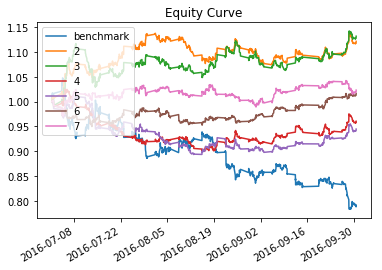

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.247585              0.001833                -0.004153   
1               0.275730              0.001979                -0.005985   
2               0.257162             -0.000592                -0.005621   
3               0.258408             -0.000850                -0.007546   
4               0.240011              0.000276                -0.011480   
5               0.251488              0.000384                -0.017259   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.009904                  0.000724             -0.018994   
1                 0.016045                  0.001582             -0.023318   
2                 0.008321                 -0.000193             -0.033059   
3                 0.010310                 -0.000473             -0.033297   
4                 0.013068                  0.000607             -0.058051   
5     

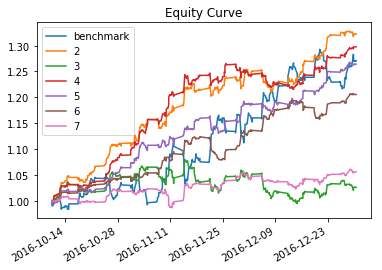

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.243510              0.004689                -0.005858   
1               0.279352              0.000475                -0.010278   
2               0.232753              0.004374                -0.005556   
3               0.254418              0.003929                -0.008023   
4               0.269140              0.003144                -0.011770   
5               0.286609              0.000929                -0.019431   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006749                  0.001512             -0.034065   
1                 0.009236                  0.000281             -0.044688   
2                 0.007494                  0.001581             -0.036029   
3                 0.010454                  0.002331             -0.044067   
4                 0.014462                  0.003699             -0.046604   
5     

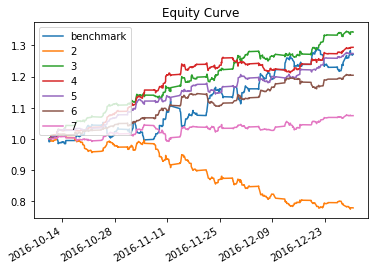

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.310719             -0.004121                -0.247261   
1               0.260467              0.004948                -0.009424   
2               0.231968              0.004324                -0.005691   
3               0.254950              0.004057                -0.008092   
4               0.269339              0.003121                -0.012839   
5               0.284164              0.001219                -0.021247   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                 -0.123631             -0.247261   
1                 0.015932                  0.004435             -0.037689   
2                 0.007591                  0.001607             -0.036029   
3                 0.010603                  0.002473             -0.044853   
4                 0.016427                  0.004423             -0.049825   
5     

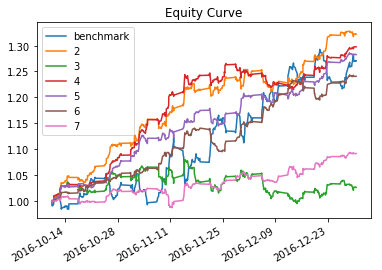

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.243510              0.004689                -0.005858   
1               0.279352              0.000475                -0.010278   
2               0.232753              0.004374                -0.005556   
3               0.254326              0.004175                -0.007930   
4               0.268606              0.003622                -0.012238   
5               0.284453              0.001481                -0.019483   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.006749                  0.001512             -0.034065   
1                 0.009236                  0.000281             -0.044688   
2                 0.007494                  0.001581             -0.036029   
3                 0.010495                  0.002488             -0.044067   
4                 0.015199                  0.004495             -0.046604   
5     

In [12]:
#zn
import matplotlib.pyplot as plt

prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]

for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        print('pct_th='+str(pct_th_bps)+'bps, freq = '+str(freq)+'min')
        filepath = "C:\\Users\\"+which_pc+"\\QishiQR\\Strategy\\"+str(pct_th_bps)+"bps"
        slm = pd.DataFrame()
        for path, dirlist, filelist in os.walk(filepath):
            #print(filelist)
            for filename in fnmatch.filter(filelist, prod+"_*_major_strategy_"+str(freq)+"_*.csv"):
                print(filename)
                data = pd.read_csv(os.path.join(path,filename))
                slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
        
        slm = slm.groupby(['prior']).sum().reset_index()
        slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
        print(slm.tail(3))
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type), 
                                         max_order=7, offsets_average=True, n_offsets=5, tca = None, price='LastPrice', fixed_cost = 0.00032)
            lm_validation.run()
        
        for slm_th_type in slm_th_type_set:
            slm_th = SLM(slm, 0.1, th_type = slm_th_type).run()
            lm_validation = LmValidation(slm_th, start='2016-10-1', end='2016-12-31', symbol=prod+'_major', data_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Output\\'+str(pct_th_bps)+'bps\\'+prod+'\\'+str(freq)+'min', valid_dir=r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS', 
                                         max_order=7, offsets_average=True, n_offsets=5, tca = None, price='AveragePrice', fixed_cost = 0.00032 )
            lm_validation.run()

# Summary

In [13]:
#zn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
prod = 'bu'
freq_set =[5, 10, 15, 30]
pct_th_bps_set = [0, 5, 10]
slm_th_type_set = [1, 2, 3]
fig, axarr= plt.subplots(36, 2, figsize = (10, 130))
fig.subplots_adjust(hspace=0.3, wspace=0.05)
img_cnt = 0
for pct_th_bps in pct_th_bps_set:
    for freq in freq_set:
        for slm_th_type in slm_th_type_set:
            valid_dir_IS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)
            valid_dir_OS =r'C:\\Users\\'+which_pc+'\\QishiQR\\Validation\\'+prod+'\\'+str(pct_th_bps)+'bps\\'+str(freq)+'min'+'\\type'+str(slm_th_type)+'\\OS'
            print(valid_dir_IS)
            print(valid_dir_OS)
            img0 = mpimg.imread(valid_dir_IS+'\\performance_'+prod+'_major.png')
            img1 = mpimg.imread(valid_dir_OS+'\\performance_'+prod+'_major.png')
        
            axarr[img_cnt,0].imshow(img0,aspect='auto')
            axarr[img_cnt,0].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str(slm_th_type)+', IS')
            axarr[img_cnt,0].axis('off')
            axarr[img_cnt,1].imshow(img1,aspect='auto')
            axarr[img_cnt,1].set_title('prod:'+prod+', price_th:'+str(pct_th_bps)+'bps, freq:'+ str(freq)+'min, slm_th_type:'+str(slm_th_type)+', OS')
            axarr[img_cnt,1].axis('off')         
            img_cnt = img_cnt+1

plt.tight_layout()            
fig.savefig(prod+'_all_test_ave_price_tca_fixed_3.2bps.png')


                  

C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type2
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type2\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type3
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\5min\type3\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type2
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type2\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type3
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\10min\type3\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type1
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type1\OS
C:\\Users\\Maxcell-HomePC\QishiQR\Validation\bu\0bps\15min\type2
C:\\Users\